In [16]:
import json
import rich
import pandas as pd
import numpy as np
import re

In [14]:
with open("alpaca_big_five_dataset_test_5_tokens.json") as f:
    test = json.load(f)
with open("mse-checkpoint-119000_whole_test_token5_alpaca.json", 'r') as f:
    pred = json.load(f)

In [17]:
pattern = r"\b(Openness|Conscientiousness|Extraversion|Agreeableness|Neuroticism)\s*-\s*(low|median|high)"
mapping = {'low': 0, 'median': 1, 'high': 2}
results = []
for t in test:
    results.append([mapping[match.group(2)] for match in re.finditer(pattern, t['instruction'])])
rs = np.array(results).T.tolist()

In [18]:
ope_g = rs[0]
con_g = rs[1]
ext_g = rs[2]
agr_g = rs[3]
neu_g = rs[4]
ope_p = pred['preds'][0]
con_p = pred['preds'][1]
ext_p = pred['preds'][2]
agr_p = pred['preds'][3]
neu_p = pred['preds'][4]

In [19]:
from evaluate import load
import numpy as np

def calculate_metrics(y_true, y_pred, average='macro'):
    accuracy_metric = load("accuracy")
    f1_metric = load("f1")
    precision_metric = load("precision")
    recall_metric = load("recall")

    accuracy = accuracy_metric.compute(references=y_true, predictions=y_pred)["accuracy"]
    f1 = f1_metric.compute(references=y_true, predictions=y_pred, average=average)["f1"]
    precision = precision_metric.compute(references=y_true, predictions=y_pred, average=average)["precision"]
    recall = recall_metric.compute(references=y_true, predictions=y_pred, average=average)["recall"]

    return accuracy, f1, precision, recall

In [20]:
accuracies = []
f1s = []
precisions = []
recalls = []
accuracy, f1, precision, recall = calculate_metrics(ope_g, ope_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(con_g, con_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(ext_g, ext_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(agr_g, agr_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(neu_g, neu_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)


/tmp/ipykernel_1964936/1674184911.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 5))


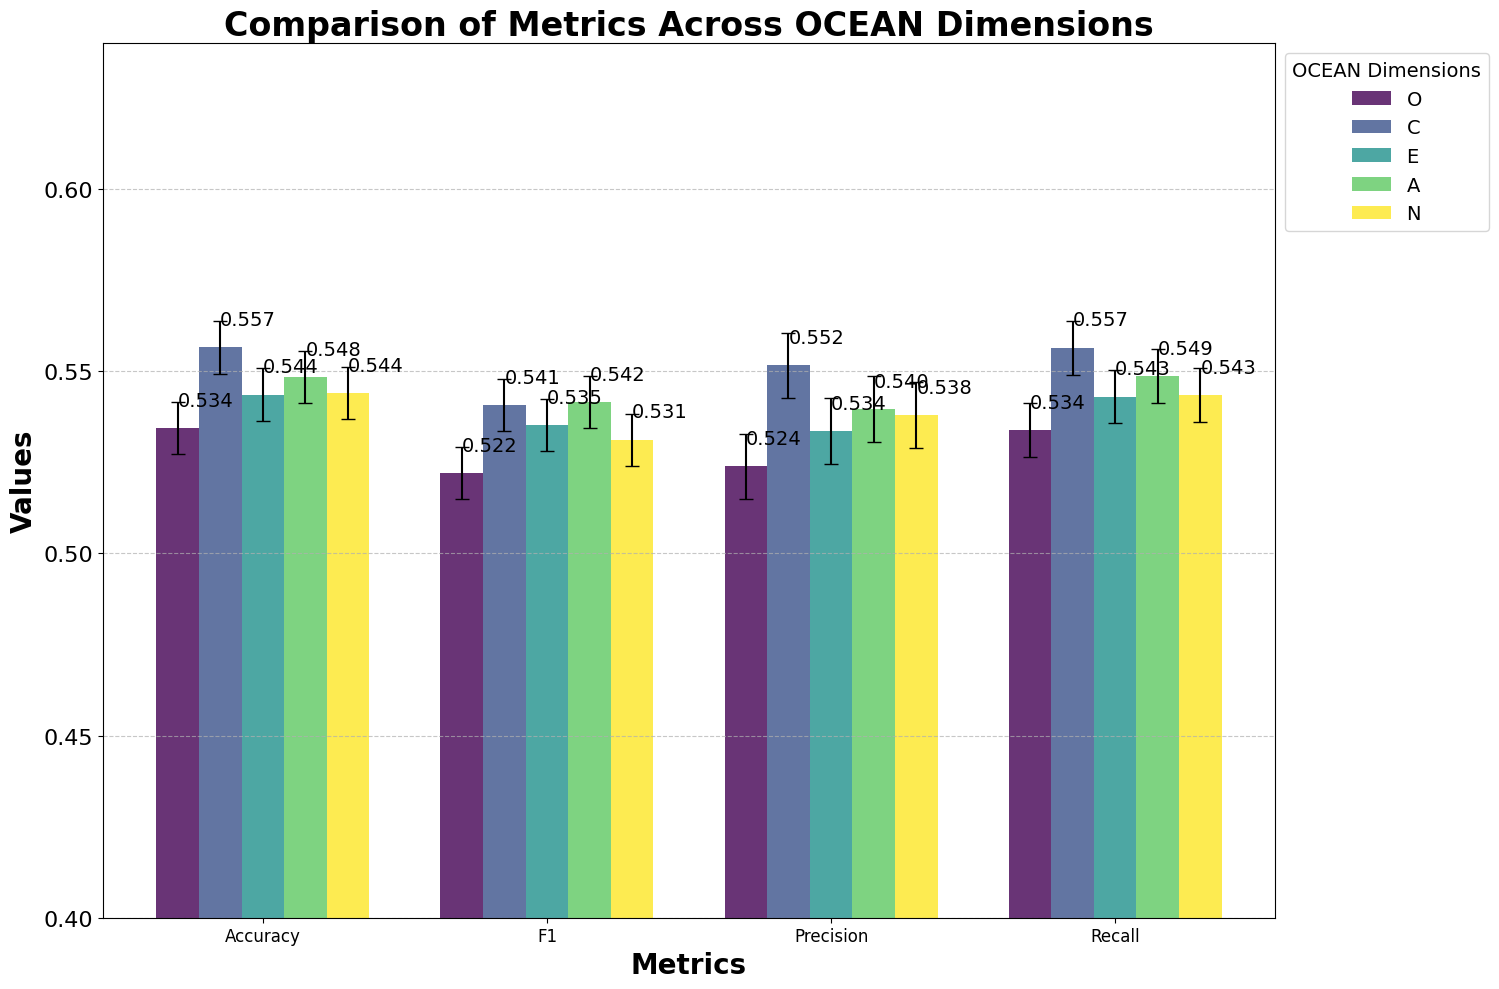

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# 将所有数据组合到一个列表中
data = [accuracies, f1s, precisions, recalls]

# 定义metrics和维度
metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
dimensions = ['O', 'C', 'E', 'A', 'N']

errors = [np.std(metric) for metric in data]
# Set up the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Set bar width and positions
bar_width = 0.15
r = np.arange(len(metrics))

# Set colors
colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 5))

# Plot bars with error bars
for i in range(len(dimensions)):
    ax.bar(r + i*bar_width, [d[i] for d in data], width=bar_width, label=dimensions[i], color=colors[i], alpha=0.8)
    ax.errorbar(r + i*bar_width, [d[i] for d in data], yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customize the plot
ax.set_xlabel('Metrics', fontsize=20, fontweight='bold')
ax.set_ylabel('Values', fontsize=20, fontweight='bold')
ax.set_title('Comparison of Metrics Across OCEAN Dimensions', fontsize=24, fontweight='bold')
ax.set_xticks(r + bar_width*2)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(title='OCEAN Dimensions', title_fontsize='14', fontsize='14', loc='upper left', bbox_to_anchor=(1, 1))

# Set y-axis range
ax.set_ylim(0.40, 0.64)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.set_tick_params(labelsize=16)
# Add value labels on top of each bar
for i in range(len(metrics)):
    for j in range(len(dimensions)):
        ax.text(r[i] + j*bar_width, data[i][j] + 0.005, f'{data[i][j]:.3f}', 
                ha='left', va='bottom', fontsize=14, rotation=0)

# Add a text box with additional information
# info_text = "Note:\n• Error bars represent standard deviation\n• OCEAN: Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism\n• Values are simulated based on provided accuracy data"
ax.text(1.05, 0.05, None, transform=ax.transAxes, fontsize=20, verticalalignment='bottom', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Make room for the legend

# Show plot
plt.show()